# **Linear Regression**: Human Brain Weight 🧠

This dataset was compiled using a medical study conducted on a group of people. This dataset shows a few variations of head sizes and masses of brains, it also consists additional gender and age group columns. The goal of the study is to predict the masses of the brains using the data, and later compare it with the actual masses of brains mentioned in the dataset.

# **Linear Regression with Scikit-Learn**

$\qquad$ <span style="color:gray"><b>0.</b> Settings </span><br>
$\qquad$ <span style="color:gray"><b>1.</b> Dataset </span><br>
$\qquad$ <span style="color:gray"><b>2.</b> Data Preprocessing </span><br>
$\qquad$ <span style="color:gray"><b>3.</b> Data Preparation </span><br>
$\qquad\qquad$ <span style="color:gray"><b>3.1.</b> One-Hot-Encoding </span><br>
$\qquad\qquad$ <span style="color:gray"><b>3.2.</b> Ordinal-Encoding </span><br>
$\qquad\qquad$ <span style="color:gray"><b>3.3.</b> Update </span><br>
$\qquad\qquad$ <span style="color:gray"><b>3.4.</b> Split in train and validation </span><br>
$\qquad$ <span style="color:gray"><b>4.</b> Linear Regression with Scikit-Learn </span><br>
$\qquad\qquad$ <span style="color:gray"><b>4.1.</b> Training </span><br>
$\qquad\qquad$ <span style="color:gray"><b>4.2.</b> Model choice </span><br>
$\qquad\qquad$ <span style="color:gray"><b>4.3.</b> Model evaluation </span><br>

## **0.** Settings

In [98]:
# Libraries
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd  
import numpy as np

%matplotlib inline

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Warnings off
import warnings
warnings.filterwarnings("ignore")

## **1.** Dataset

In [ ]:
'''
    DATASET INFORMATIONS

    |--------------|------------|-------|--------------------------------------------------------------|
    | Name         | Data Type  | Meas. | Description                                                  |
    |--------------|------------|-------|--------------------------------------------------------------|
    | Gender       | nominal    |       | 1 represents Male, 2 represents Female                       |
    | Age Range    | nominal    |       | 1 represents >18 years of age, 2 represents <18 years of age |
    | Head Size    | continuous | cm^3  | Head volume                                                  |
    | Brain Weight | continuous | grams | Mass of brains                                               |
    |--------------|------------|-------|--------------------------------------------------------------|  

'''

In [2]:
# Import the dataset
data = pd.read_csv('./dataset.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
data.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [4]:
data.columns = ['Gender', 'Age Range', 'Head Size', 'Brain Weight']
data.columns

Index(['Gender', 'Age Range', 'Head Size', 'Brain Weight'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Gender        237 non-null    int64
 1   Age Range     237 non-null    int64
 2   Head Size     237 non-null    int64
 3   Brain Weight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


## **2.** Data Preprocessing

In [6]:
# Null elements
data.isnull().sum()

Gender          0
Age Range       0
Head Size       0
Brain Weight    0
dtype: int64

There are no missing values in this dataset.

## **3.** Data Preparation

In [86]:
X = data[['Gender', 'Age Range', 'Head Size']]
Y = data['Brain Weight']

In [87]:
X.dtypes

Gender       int64
Age Range    int64
Head Size    int64
dtype: object

This is not good, the 'Age Range' and the 'Gender' are not numbers that should be considered as numbers, they are categories and should therefore be dummies-converted. Actually to 'Age Range' we can apply an Ordinal-Encoding (since it makes sense to give growth meaning), while to 'Gender' we apply a One-Hot-Encoder.

### **3.1.** One-Hot-Encoding

In [88]:
## ONE-HOT-ENCODING: 'Gender'

# Encoding
gender_encoded = OneHotEncoder().fit_transform(X[['Gender']]);

# Transform in a DataFrame
gender_encoded = pd.DataFrame(gender_encoded.toarray()).astype(int)

# Show results
gender_encoded.head()

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [89]:
# What is the association?
X['Gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [90]:
# It is possible to conclude:
#   1 -> Male   -> [1, 0]
#   2 -> Female -> [0, 1]

gender_encoded.columns = ['Male', 'Female']
gender_encoded

,Male,Female
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
232,0,1
233,0,1
234,0,1
235,0,1


### **3.2.** Ordinal-Encoding

In [93]:
## ORDINAL-ENCODING: 'Age Range' 

# Encoding
age_encoded = OrdinalEncoder().fit_transform(X[['Age Range']]);

# Transform in a DataFrame
age_encoded = pd.DataFrame(age_encoded).astype(int)

# Show results
age_encoded.head()

,0
0,0
1,0
2,0
3,0
4,0


In [94]:
# Perform a replacement to have: 0 == <18, 1 == >18
age_encoded = age_encoded.replace({0:1, 1:0})
age_encoded.head()

,0
0,1
1,1
2,1
3,1
4,1


In [95]:
# What is the association?
X['Age Range'].head()

0    1
1    1
2    1
3    1
4    1
Name: Age Range, dtype: int64

In [ ]:
# It is possible to conclude:
#   1 -> >18 -> 1
#   2 -> <18 -> 0

### **3.3.** Update

In [96]:
# Add 'Gender' encoded
X = pd.concat([X, gender_encoded], axis=1)

# Drop the old 'Gender'  
X = X.drop('Gender', axis=1) 

# Substitute 'Age Range' with 'age_encoded'
X['Age Range'] = age_encoded

# Check
X

,Age Range,Head Size,Male,Female
0,1,4512,1,0
1,1,3738,1,0
2,1,4261,1,0
3,1,3777,1,0
4,1,4177,1,0
...,...,...,...,...
232,0,3214,0,1
233,0,3394,0,1
234,0,3233,0,1
235,0,3352,0,1


### **3.4.** Split in train and validation

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(189, 4)
(48, 4)
(189,)
(48,)


## **4.** Linear Regression with **Scikit-Learn**

### **4.1.** Training

Let us compare simple and regularized linear regression:

* **Linear regression** fits a linear model with coefficients $\boldsymbol{w}$ to minimize the residual sum of squares between the observed targets in the dataset and the targets predicted by the linear approximation:<br><br>$\qquad\min_{\boldsymbol{w}} ||\boldsymbol{w}\,\boldsymbol{X} - y||_2^2$

* **Rdige regression** imposes a penalty on the size of the coefficients, namely its coefficients minimize a penalized residual sum of squares:<br><br>$\qquad\min_{\boldsymbol{w}} ||\boldsymbol{w}\,\boldsymbol{X} - y||_2^2 +\alpha||\boldsymbol{w}||_2^2$<br><br>
The complexity parameter $\alpha\geq 0$ controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

* **Lasso regression** is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. It consists of a linear model with an added regularization term. The objective function to minimize is:<br><br>
$\qquad\min_{\boldsymbol{w}} \frac{1}{2\,n_{samples}}||\boldsymbol{w}\,\boldsymbol{X} - y||_2^2 +\alpha||\boldsymbol{w}||_1$<br><br>
The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha||\boldsymbol{w}||_1$ added.

* **ElasticNet regression** is a linear regression model trained with both Ridge and Lasso regularizations on the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of the two regularization methods with the parameter $\rho$. Elastic-net is useful when there are multiple features that are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both. The objective function to minimize is:<br><br>
$\qquad\min_{\boldsymbol{w}} \frac{1}{2\,n_{samples}}||\boldsymbol{w}\,\boldsymbol{X} - y||_2^2 +\alpha\rho||\boldsymbol{w}||_1 + \frac{\alpha(1-\rho)}{2}||\boldsymbol{w}||_2^2$<br>

In [116]:
# Define models
models = {
    'Linear'     : LinearRegression(),
    'Ridge'      : Ridge(),
    'Lasso'      : Lasso(),
    'ElasticNet' : ElasticNet()}

In [117]:
def train_models(models, X_train, X_test, Y_train, Y_test):

    np.random.seed(42)

    count_models = 0 

    for name, model in models.items():

        # Training/Fitting
        model.fit(X_train, Y_train)

        # Predictions (on the training set)
        Y_pred_train = model.predict(X_train)
       
        # Metrics
        model_train_score = model.score(X_train, Y_train)
        model_test_score  = model.score(X_test, Y_test)
        model_mse         = mean_squared_error(Y_train, Y_pred_train)
        model_rmse        = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
        model_mae         = mean_absolute_error(Y_train, Y_pred_train)
        model_r2          = r2_score(Y_train, Y_pred_train)

        # If this is the first model trained we create the DataFrame 'results'
        if count_models == 0:
            results = pd.DataFrame([
                model_train_score, 
                model_test_score, 
                model_mse, 
                model_rmse, 
                model_mae, 
                model_r2],
                index = ['Train Accuracy', 'Test Accuracy', 'MSE', 'RMSE', 'MAE', 'R2'],
                columns = [name])

        # otherwise we just append the results to the already-existsing DataFrame 'results'
        else:
            results[name] = [
                model_train_score, 
                model_test_score, 
                model_mse, 
                model_rmse, 
                model_mae, 
                model_r2]

        count_models += 1
        
    print(f'Trained {count_models} models')

    return results.T


In [118]:
results = train_models(models, X_train, X_test, Y_train, Y_test)

Trained 4 models


### **4.2.** Model choice

Some good metrics to consider to choose the model:

* **MSE** - Mean Squared Error<br><br>
$\qquad MSE = \frac{1}{n}\sum_i (y_i - \hat{y}_i)^2$<br><br>
The mean squared error (MSE) or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors, that is, the average squared difference between the estimated values and the actual value.

* **RMSE** - Root Mean Square Error<br><br>
$\qquad RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n}\sum_i (y_i - \hat{y}_i)^2}$<br><br>
The root-mean-square error (RMSE), or root-mean-square deviation (RMSD), is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed.

* **MAE** - Mean Absolute Error<br><br>
$\qquad MAE = \frac{1}{n} \sum_i |y_i - \hat{y}_i|$<br><br>
Mean absolute error (MAE) is frequently used for regression. In particular, MAE is used for regressions for which we don’t want outliers to play a big role.

* **R**$^{\boldsymbol{2}}$ - Coefficient of determination<br><br>
$\qquad R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$<br><br>
where $SS_{res} = \sum_i (y_i - \hat{y}_i)^2$ is the *residual sum of squares* and $SS_{tot} = \sum_i (y_i - \bar{y})^2$ is the *total sum of squares* ($\bar{y} = \frac{1}{n}\sum_i y_i$).<br>
A baseline model, which always predicts $\bar{y}$ has $R^2=0$. Models that have worse predictions that this baseline will have a negative $R^2$. In the case in which the model values match exatcly the observed values ($SS_{res}=0$) it happens that $R^2=1$.

In [122]:
# Overall results
results

,Train Accuracy,Test Accuracy,MSE,RMSE,MAE,R2
Linear,0.614110,0.776742,5403.786805,73.510454,57.113235,0.614110
Ridge,0.614105,0.776455,5403.858223,73.510939,57.101169,0.614105
Lasso,0.613298,0.770211,5415.164016,73.587798,56.962264,0.613298
ElasticNet,0.608830,0.762208,5477.733661,74.011713,57.154729,0.608830


In [123]:
metrics_to_maximize = ['Train Accuracy', 'Test Accuracy', 'R2']
metrics_to_minimize = ['MSE', 'RMSE', 'MAE']

print('Metrics to maximize: ')
results[metrics_to_maximize].style.highlight_max(color= 'lightgreen', axis=0)

Metrics to maximize: 


,Train Accuracy,Test Accuracy,R2
Linear,0.614110,0.776742,0.614110
Ridge,0.614105,0.776455,0.614105
Lasso,0.613298,0.770211,0.613298
ElasticNet,0.608830,0.762208,0.608830


In [124]:
print('Metrics to minimize: ')
results[metrics_to_minimize].style.highlight_min(color='lightgreen', axis=0)

Metrics to minimize: 


,MSE,RMSE,MAE
Linear,5403.786805,73.510454,57.113235
Ridge,5403.858223,73.510939,57.101169
Lasso,5415.164016,73.587798,56.962264
ElasticNet,5477.733661,74.011713,57.154729


### **4.3.** Model evaluation

Overall, the linear model is the best.

In [125]:
# Training of the model
model = LinearRegression()
model.fit(X_train, Y_train);

In [126]:
# Coefficients analysis

coefficients = {}

# Save the coefficients
for i in range(len(model.coef_)):
    coefficients[X.columns[i]] = model.coef_[i]

# Add the intercept
coefficients['Intercept'] = model.intercept_

In [127]:
coefficients_dataframe = pd.DataFrame(coefficients.values()).T
coefficients_dataframe.columns = coefficients.keys()
coefficients_dataframe

,Age Range,Head Size,Male,Female,Intercept
0,22.562647,0.242566,7.104745,-7.104745,393.024595


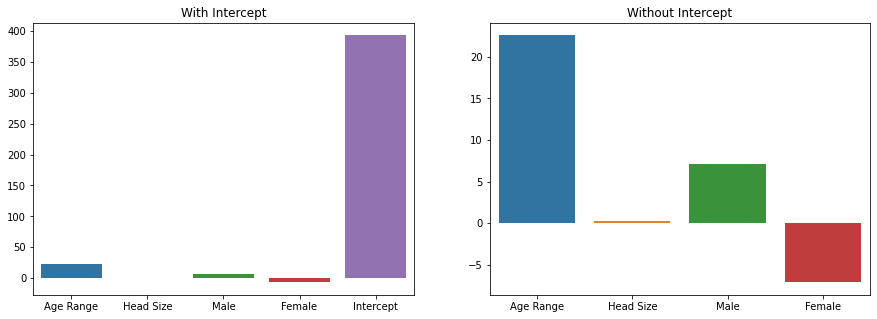

In [128]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.barplot(data = coefficients_dataframe);
plt.title('With Intercept');

plt.subplot(1,2,2)
sns.barplot(data = coefficients_dataframe[['Age Range', 'Head Size', 'Male', 'Female']]);
plt.title('Without Intercept');

In [129]:
# Evaluation
Y_pred_train = model.predict(X_train)

# Metrics
r2          = r2_score(Y_train, Y_pred_train)
mae         = mean_absolute_error(Y_train, Y_pred_train)
mse         = mean_squared_error(Y_train, Y_pred_train)
rmse        = np.sqrt(mse)
score_train = model.score(X_train, Y_train)
score_test  = model.score(X_test, Y_test)

print(f'R2 Score: {r2}')
print(f'Training Accuracy: {score_train}')
print(f'Test Accuracy: {score_test}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error: {rmse}')

R2 Score: 0.6141102935912988
Training Accuracy: 0.6141102935912988
Test Accuracy: 0.7767424819420188
Mean Absolute Error: 57.11323529480088
Mean Square Error: 5403.78680464104
Root Mean Square Error: 73.5104537099387
